In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import math
import matplotlib.pyplot as plt

In [377]:
idle = pd.DataFrame()
csv_files = sorted(glob.glob('data//idle//*.csv'), key=lambda x: int(x.split('.')[0].split('-')[1]))
dfs = []

In [378]:
def interquantile_range(series):
    return series.quantile(0.75) - series.quantile(0.25)

In [379]:
def zero_crossing_rate(signal):
    sign_changes = np.sum(np.abs(np.diff(np.sign(signal))) > 0)
    return sign_changes / (len(signal) - 1)

In [380]:
for file in csv_files:
    df = pd.read_csv(file)
    # Extract the number from the filename
    file_name = file.split('.')[0].split('//')[1].split('\\')[1]
    # Add the filename as a column
    df['filename'] = file_name
    df['derivative_X'] = df['accelerometer_X'].diff() / 470
    df['derivative_Y'] = df['accelerometer_Y'].diff() / 470
    df['derivative_Z'] = df['accelerometer_Z'].diff() / 470
    df['pitch'] = np.arctan2(df['accelerometer_Y'], np.sqrt(df['accelerometer_X']**2 + df['accelerometer_Z']**2))
    df['roll'] = np.arctan2(-df['accelerometer_X'], df['accelerometer_Z'])
    df['SMV'] = (df['accelerometer_X']**2 + df['accelerometer_Y']**2 + df['accelerometer_Z']**2)**0.5
    df[['pitch', 'roll']] = np.degrees(df[['pitch', 'roll']])
    # Append the DataFrame to the aggregated DataFrame
    dfs.append(df)

In [381]:
idle = pd.concat(dfs, ignore_index=True)
idle = idle.fillna(0)

In [382]:
idle.set_index('filename', inplace=True)

In [383]:
idle

,accelerometer_X,accelerometer_Y,accelerometer_Z,derivative_X,derivative_Y,derivative_Z,pitch,roll,SMV
filename,,,,,,,,,
idle-1,1.000776,4.616021,8.576031,0.000000,0.000000,0.000000,28.129805,-6.656001,9.790685
idle-1,0.718261,4.209007,8.446744,-0.000601,-0.000866,-0.000275,26.404744,-4.860401,9.464625
idle-1,-0.909797,-0.282516,9.203311,-0.003464,-0.009556,0.001610,-1.749745,5.645654,9.252485
idle-1,5.099650,0.148441,8.418014,0.012786,0.000917,-0.001671,0.864073,-31.207566,9.843344
idle-1,1.762132,-0.162806,9.251195,-0.007101,-0.000662,0.001773,-0.990406,-10.784296,9.418929
...,...,...,...,...,...,...,...,...,...
idle-1039,1.292869,6.641516,7.958327,0.001589,0.002119,-0.001039,39.479568,-9.227367,10.445871
idle-1039,0.636858,6.311116,7.354988,-0.001396,-0.000703,-0.001284,40.526277,-4.948817,9.712447
idle-1039,-0.402226,5.382166,8.810662,-0.002211,-0.001976,0.003097,31.392965,2.613863,10.332341


In [384]:
idle_grouped = idle.groupby('filename').agg({
    'accelerometer_X': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'accelerometer_Y': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'accelerometer_Z': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'SMV': ['mean', 'std', 'median'],
    'derivative_X': ['mean', 'std', 'median', 'skew', interquantile_range],
    'derivative_Y': ['mean', 'std', 'median', 'skew', interquantile_range],
    'derivative_Z': ['mean', 'std', 'median', 'skew', interquantile_range],
    'pitch': ['mean', 'std', 'median', interquantile_range],
    'roll': ['mean', 'std', 'median', interquantile_range]
})

In [385]:
idle_grouped

accelerometer_X                                                   \
                     mean       std      skew    median zero_crossing_rate   
filename                                                                     
idle-1           0.178448  1.036361  4.044308 -0.102950           0.172414   
idle-10         -0.098641  0.125848  2.300676 -0.114922           0.137931   
idle-100        -0.099918  0.015642  0.604258 -0.100556           0.000000   
idle-1000        0.400949  0.052889  0.401492  0.392649           0.000000   
idle-1001        0.400949  0.053187  0.387552  0.402226           0.000000   
...                   ...       ...       ...       ...                ...   
idle-995         0.407972  0.034722  0.150862  0.404620           0.000000   
idle-996         0.407812  0.034509  0.176068  0.404620           0.000000   
idle-997         0.401747  0.038294 -0.022002  0.395043           0.000000   
idle-998         0.403822  0.037374 -0.135651  0.404620           0.000000   
idle-999         0.400630  0.036453 -0.035862  0.395043           0.000000   

                              accelerometer_Y                                \
          interquantile_range            mean       std      skew    median   
filename                                                                      
idle-1               0.065840        0.167435  1.157603  3.647470 -0.131681   
idle-10              0.039505       -0.131202  0.048059  0.568223 -0.131681   
idle-100             0.021548        0.220905  0.016383 -1.272920  0.225055   
idle-1000            0.050279       -0.029528  0.054525 -0.857829 -0.021548   
idle-1001            0.051476       -0.027134  0.054004 -1.001079 -0.019154   
...                       ...             ...       ...       ...       ...   
idle-995             0.045490       -0.028411  0.037089  0.058832 -0.028730   
idle-996             0.045490       -0.026815  0.038030 -0.009364 -0.023942   
idle-997             0.045490       -0.026336  0.038467 -0.093211 -0.019154   
idle-998             0.041899       -0.026017  0.038976 -0.088563 -0.023942   
idle-999             0.043096       -0.027134  0.037899 -0.085076 -0.021548   

           ... derivative_Z                         pitch                      \
           ...         skew interquantile_range      mean       std    median   
filename   ...                                                                  
idle-1     ...     0.744923            0.000089  1.070303  7.138617 -0.771514   
idle-10    ...     1.018120            0.000059 -0.769159  0.281236 -0.770924   
idle-100   ...     0.193596            0.000051  1.295431  0.096468  1.319728   
idle-1000  ...     0.067167            0.000061 -0.173004  0.319447 -0.126817   
idle-1001  ...    -0.001351            0.000059 -0.158942  0.316373 -0.112691   
...        ...          ...                 ...       ...       ...       ...   
idle-995   ...     0.282720            0.000087 -0.166672  0.217752 -0.168147   
idle-996   ...     0.187378            0.000087 -0.157322  0.223268 -0.140419   
idle-997   ...     0.149735            0.000069 -0.154508  0.225799 -0.112698   
idle-998   ...     0.221233            0.000061 -0.152634  0.228786 -0.140419   
idle-999   ...     0.192011            0.000061 -0.159220  0.222466 -0.126817   

                                   roll                      \
          interquantile_range      mean       std    median   
filename                                                      
idle-1               0.271476 -1.142052  6.360004  0.604125   
idle-10              0.134746  0.578635  0.736415  0.674039   
idle-100             0.112337  0.586047  0.091850  0.590365   
idle-1000            0.239073 -2.353948  0.308146 -2.304083   
idle-1001            0.239182 -2.353687  0.309960 -2.358417   
...                       ...       ...       ...       ...   
idle-995             0.190008 -2.394697  0.203170 -2.379486   
idle-996             0.190120 -2.394215  0.20

In [386]:
idle_grouped['activity'] = "idle"

In [387]:
csv_files_walking = sorted(glob.glob('data//walking//*.csv'), key=lambda x: int(x.split('.')[0].split('-')[1]))
dfs_walking = []

In [388]:
for file in csv_files_walking:
    df = pd.read_csv(file)
    # Extract the number from the filename
    file_name = file.split('.')[0].split('//')[1].split('\\')[1]
    # Add the filename as a column
    df['filename'] = file_name
    df['derivative_X'] = df['accelerometer_X'].diff() / 470
    df['derivative_Y'] = df['accelerometer_Y'].diff() / 470
    df['derivative_Z'] = df['accelerometer_Z'].diff() / 470
    df['pitch'] = np.arctan2(df['accelerometer_Y'], np.sqrt(df['accelerometer_X']**2 + df['accelerometer_Z']**2))
    df['roll'] = np.arctan2(-df['accelerometer_X'], df['accelerometer_Z'])
    df['SMV'] = (df['accelerometer_X']**2 + df['accelerometer_Y']**2 + df['accelerometer_Z']**2)**0.5
    df[['pitch', 'roll']] = np.degrees(df[['pitch', 'roll']])
    # Append the DataFrame to the aggregated DataFrame
    dfs_walking.append(df)

In [389]:
walking = pd.concat(dfs_walking)
walking.fillna(0, inplace=True)

In [390]:
walking.set_index('filename', inplace=True)

In [391]:
walking

,accelerometer_X,accelerometer_Y,accelerometer_Z,derivative_X,derivative_Y,derivative_Z,pitch,roll,SMV
filename,,,,,,,,,
walking-1,2.322376,3.643975,11.827356,0.000000,0.000000,0.000000,16.821333,-11.109054,12.591995
walking-1,1.781286,4.668694,6.148310,-0.001151,0.002180,-0.012083,36.105239,-16.157339,7.922840
walking-1,7.963115,-4.113238,1.359907,0.013153,-0.018685,-0.010188,-26.983599,-80.308761,9.065279
walking-1,1.996764,-1.398214,1.163582,-0.012694,0.005777,-0.000418,-31.174371,-59.769196,2.701109
walking-1,5.185841,-12.143391,4.687847,0.006785,-0.022862,0.007498,-60.072114,-47.887350,14.011809
...,...,...,...,...,...,...,...,...,...
walking-1850,4.529830,-12.488156,-0.378284,-0.001701,-0.015252,0.000143,-69.998863,-94.773668,13.289714
walking-1850,6.871359,-11.037270,4.620809,0.004982,0.003087,0.010636,-53.121485,-56.080201,13.798144
walking-1850,7.259220,-6.244078,1.355118,0.000825,0.010198,-0.006948,-40.216245,-79.425992,9.670632


In [392]:
walking_grouped = walking.groupby('filename').agg({
    'accelerometer_X': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'accelerometer_Y': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'accelerometer_Z': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'SMV': ['mean', 'std', 'median'],
    'derivative_X': ['mean', 'std', 'median', 'skew', interquantile_range],
    'derivative_Y': ['mean', 'std', 'median', 'skew', interquantile_range],
    'derivative_Z': ['mean', 'std', 'median', 'skew', interquantile_range],
    'pitch': ['mean', 'std', 'median', interquantile_range],
    'roll': ['mean', 'std', 'median', interquantile_range]
})

In [393]:
walking_grouped['activity'] = "walking"

In [394]:
csv_files_running = sorted(glob.glob('data//running//*.csv'), key=lambda x: int(x.split('.')[0].split('-')[1]))
dfs_running = []

In [395]:
for file in csv_files_running:
    df = pd.read_csv(file)
    file_name = file.split('.')[0].split('//')[1].split('\\')[1]
    df['filename'] = file_name
    df['derivative_X'] = df['accelerometer_X'].diff() / 470
    df['derivative_Y'] = df['accelerometer_Y'].diff() / 470
    df['derivative_Z'] = df['accelerometer_Z'].diff() / 470
    df['pitch'] = np.arctan2(df['accelerometer_Y'], np.sqrt(df['accelerometer_X']**2 + df['accelerometer_Z']**2))
    df['roll'] = np.arctan2(-df['accelerometer_X'], df['accelerometer_Z'])
    df['SMV'] = (df['accelerometer_X']**2 + df['accelerometer_Y']**2 + df['accelerometer_Z']**2)**0.5
    df[['pitch', 'roll']] = np.degrees(df[['pitch', 'roll']])
    # Append the DataFrame to the aggregated DataFrame
    dfs_running.append(df)

In [396]:
running = pd.concat(dfs_running)
running.fillna(0, inplace=True)

In [397]:
running.set_index('filename', inplace=True)

In [398]:
running_grouped = running.groupby('filename').agg({
    'accelerometer_X': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'accelerometer_Y': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'accelerometer_Z': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'SMV': ['mean', 'std', 'median'],
    'derivative_X': ['mean', 'std', 'median', 'skew', interquantile_range],
    'derivative_Y': ['mean', 'std', 'median', 'skew', interquantile_range],
    'derivative_Z': ['mean', 'std', 'median', 'skew', interquantile_range],
    'pitch': ['mean', 'std', 'median', interquantile_range],
    'roll': ['mean', 'std', 'median', interquantile_range]
})

In [399]:
running_grouped['activity'] = "running"

In [400]:
csv_files_stairs = sorted(glob.glob('data//stairs//*.csv'), key=lambda x: int(x.split('.')[0].split('-')[1]))
dfs_stairs = []

In [401]:
for file in csv_files_stairs:
    df = pd.read_csv(file)
    # Extract the number from the filename
    file_name = file.split('.')[0].split('//')[1].split('\\')[1]
    # Add the filename as a column
    df['filename'] = file_name
    df['derivative_X'] = df['accelerometer_X'].diff() / 470
    df['derivative_Y'] = df['accelerometer_Y'].diff() / 470
    df['derivative_Z'] = df['accelerometer_Z'].diff() / 470
    df['pitch'] = np.arctan2(df['accelerometer_Y'], np.sqrt(df['accelerometer_X']**2 + df['accelerometer_Z']**2))
    df['roll'] = np.arctan2(-df['accelerometer_X'], df['accelerometer_Z'])
    df['SMV'] = (df['accelerometer_X']**2 + df['accelerometer_Y']**2 + df['accelerometer_Z']**2)**0.5
    df[['pitch', 'roll']] = np.degrees(df[['pitch', 'roll']])
    # Append the DataFrame to the aggregated DataFrame
    dfs_stairs.append(df)

In [402]:
stairs = pd.concat(dfs_stairs)
stairs.fillna(0, inplace=True)

In [403]:
stairs.set_index('filename', inplace=True)

In [404]:
stairs_grouped = stairs.groupby('filename').agg({
    'accelerometer_X': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'accelerometer_Y': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'accelerometer_Z': ['mean', 'std', 'skew', 'median', zero_crossing_rate, interquantile_range],
    'SMV': ['mean', 'std', 'median'],
    'derivative_X': ['mean', 'std', 'median', 'skew', interquantile_range],
    'derivative_Y': ['mean', 'std', 'median', 'skew', interquantile_range],
    'derivative_Z': ['mean', 'std', 'median', 'skew', interquantile_range],
    'pitch': ['mean', 'std', 'median', interquantile_range],
    'roll': ['mean', 'std', 'median', interquantile_range]
})

In [405]:
stairs_grouped['activity'] = "stairs"

In [406]:
stairs_grouped

accelerometer_X                                                   \
                      mean       std      skew    median zero_crossing_rate   
filename                                                                      
stairs-1          2.830745  3.302172 -0.492919  3.447650           0.344828   
stairs-10         2.033795  3.476321 -0.032067  1.632846           0.448276   
stairs-100        0.864945  2.847727  0.010715  1.376666           0.379310   
stairs-101        0.850101  2.812559  0.067719  1.132457           0.379310   
stairs-102        0.570139  2.715524  0.239187  0.773327           0.344828   
...                    ...       ...       ...       ...                ...   
stairs-95         0.881545  2.962215  0.017073  1.235408           0.413793   
stairs-96         0.871490  2.928768  0.021941  1.132457           0.413793   
stairs-97         0.881705  2.938536  0.019514  1.132457           0.413793   
stairs-98         0.964544  2.958615 -0.059084  1.376666           0.413793   
stairs-99         0.957681  2.932814 -0.018694  1.376666           0.413793   

                               accelerometer_Y                                 \
           interquantile_range            mean       std      skew     median   
filename                                                                        
stairs-1              3.848680       -7.161376  4.710145 -0.280692  -7.153874   
stairs-10             5.097256       -9.477846  4.791658 -0.747500  -7.963115   
stairs-100            3.859453       -9.368990  4.230074 -0.968323  -9.289502   
stairs-101            3.518280       -9.412564  4.164104 -1.054399  -9.265560   
stairs-102            3.587712       -8.606676  3.422683 -0.318812  -8.482656   
...                        ...             ...       ...       ...        ...   
stairs-95             4.224569       -9.970413  4.482366 -0.728449 -10.110713   
stairs-96             4.129998       -9.944875  4.410401 -0.861020  -9.837775   
stairs-97             3.991135      -10.013190  4.417071 -0.814399  -9.837775   
stairs-98             4.129998      -10.231062  4.324824 -0.765965 -10.110713   
stairs-99             4.027048       -9.805852  4.529009 -0.815846  -9.536105   

            ...        derivative_Z      pitch                        \
            ... interquantile_range       mean        std     median   
filename    ...                                                        
stairs-1    ...            0.012705 -51.006161  25.480280 -59.640775   
stairs-10   ...            0.016217 -60.154750  19.600034 -61.987747   
stairs-100  ...            0.019342 -59.455828  13.855899 -60.742113   
stairs-101  ...            0.019342 -60.401780  13.383633 -62.093663   
stairs-102  ...            0.017241 -60.564602  13.527052 -61.666545   
...         ...                 ...        ...        ...        ...   
stairs-95   ...            0.016813 -59.154401  13.591984 -62.832328   
stairs-96   ...            0.016354 -59.729961  12.078954 -62.093663   
stairs-97   ...            0.020017 -58.190428  12.786087 -61.381151   
stairs-98   ...            0.020335 -58.498473  12.483445 -61.381151   
stairs-99   ...            0.020305 -59.532930  13.606348 -62.093663   

                                     roll                          \
           interquantile_range       mean         std      median   
filename                                                            
stairs-1             26.434132 -59.708354   76.116876  -88.555881   
stairs-10            25.062116 -65.375827   83.595383  -94.293394   
stairs-100           13.803659 -62.146359  121.908579 -128.642405   
stairs-101           14.024776 -48.925187  132.603854 -128.642405   
stairs-102           14.387566 -30.991164  137.370249 -115.247162   
...                        ...        ...         ...         ...   
stairs-95            15.685429 -61.273676  115.293557 -114.169876   
stairs-96            12.158045 -68.471981  117.131577 -117.279671   
s

In [407]:
all_samples = [idle_grouped, walking_grouped, running_grouped, stairs_grouped]
full_sample = pd.concat(all_samples)

In [408]:
full_sample.columns = [' '.join(col).strip() for col in full_sample.columns.values]

In [409]:
full_sample['SMV mean']

filename
idle-1        9.736895
idle-10       9.773491
idle-100      9.771537
idle-1000     9.761108
idle-1001     9.762216
               ...    
stairs-95    11.978084
stairs-96    11.876316
stairs-97    12.191738
stairs-98    12.433324
stairs-99    11.917558
Name: SMV mean, Length: 6462, dtype: float64

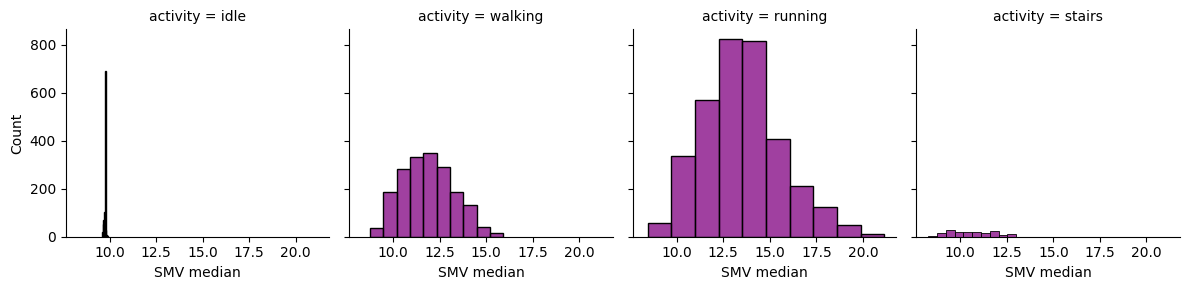

In [410]:
grid = sns.FacetGrid(full_sample, col='activity', margin_titles=True)
grid.map_dataframe(sns.histplot, x='SMV median', bins=10, color='purple')

In [411]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [427]:
y_full_sample = full_sample["activity"]
x_full_sample = full_sample.drop("activity", axis=1)

In [413]:
x_full_sample

,accelerometer_X mean,accelerometer_X std,accelerometer_X skew,accelerometer_X median,accelerometer_X zero_crossing_rate,accelerometer_X interquantile_range,accelerometer_Y mean,accelerometer_Y std,accelerometer_Y skew,accelerometer_Y median,...,derivative_Z skew,derivative_Z interquantile_range,pitch mean,pitch std,pitch median,pitch interquantile_range,roll mean,roll std,roll median,roll interquantile_range
filename,,,,,,,,,,,,,,,,,,,,,
idle-1,0.178448,1.036361,4.044308,-0.102950,0.172414,0.065840,0.167435,1.157603,3.647470,-0.131681,...,0.744923,0.000089,1.070303,7.138617,-0.771514,0.271476,-1.142052,6.360004,0.604125,0.386515
idle-10,-0.098641,0.125848,2.300676,-0.114922,0.137931,0.039505,-0.131202,0.048059,0.568223,-0.131681,...,1.018120,0.000059,-0.769159,0.281236,-0.770924,0.134746,0.578635,0.736415,0.674039,0.230980
idle-100,-0.099918,0.015642,0.604258,-0.100556,0.000000,0.021548,0.220905,0.016383,-1.272920,0.225055,...,0.193596,0.000051,1.295431,0.096468,1.319728,0.112337,0.586047,0.091850,0.590365,0.125053
idle-1000,0.400949,0.052889,0.401492,0.392649,0.000000,0.050279,-0.029528,0.054525,-0.857829,-0.021548,...,0.067167,0.000061,-0.173004,0.319447,-0.126817,0.239073,-2.353948,0.308146,-2.304083,0.298701
idle-1001,0.400949,0.053187,0.387552,0.402226,0.000000,0.051476,-0.027134,0.054004,-1.001079,-0.019154,...,-0.001351,0.000059,-0.158942,0.316373,-0.112691,0.239182,-2.353687,0.309960,-2.358417,0.307612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stairs-95,0.881545,2.962215,0.017073,1.235408,0.413793,4.224569,-9.970413,4.482366,-0.728449,-10.110713,...,-0.442782,0.016813,-59.154401,13.591984,-62.832328,15.685429,-61.273676,115.293557,-114.169876,170.345964
stairs-96,0.871490,2.928768,0.021941,1.132457,0.413793,4.129998,-9.944875,4.410401,-0.861020,-9.837775,...,0.180941,0.016354,-59.729961,12.078954,-62.093663,12.158045,-68.471981,117.131577,-117.279671,177.376348
stairs-97,0.881705,2.938536,0.019514,1.132457,0.413793,3.991135,-10.013190,4.417071,-0.814399,-9.837775,...,0.135291,0.020017,-58.190428,12.786087,-61.381151,12.783173,-71.474689,118.834380,-134.072005,179.007394


In [437]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_full_sample, y_full_sample, test_size=0.3, random_state=42)

In [443]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [416]:
model_dt_gini = make_pipeline(RobustScaler(),
                      DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=4, min_samples_leaf=5))
  

In [417]:
y_model_dt_gini = model_dt_gini.fit(Xtrain, ytrain).predict(Xtest)

In [418]:
accuracy_score(ytest, y_model_dt_gini)

0.9845281072717896

In [419]:
mat = confusion_matrix(ytest, y_model_dt_gini)
mat

array([[ 317,    0,    0,    0],
       [   0, 1022,    0,    0],
       [   0,    0,   18,   26],
       [   0,    1,    3,  552]], dtype=int64)

In [445]:
cv_score = cross_val_score(model_dt_gini, x_full_sample, y_full_sample, cv=5).mean()
cv_score

0.9637901393308574

Text(113.9222222222222, 0.5, 'true value')

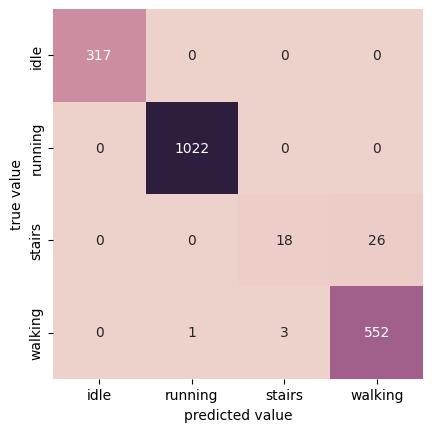

In [420]:
sns.heatmap(mat, 
            annot=True, 
            fmt='.0f',
            square=True,
            cmap=sns.cubehelix_palette(as_cmap=True), 
            xticklabels=['idle', 'running', 'stairs', 'walking'], 
            yticklabels=['idle', 'running', 'stairs', 'walking'],
           cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [421]:
from sklearn.decomposition import PCA

In [438]:
model = PCA(n_components = 2)
model.fit(Xtest)
X_2d = model.transform(Xtest)

In [439]:
Xtest['PCA1'] = X_2d[:, 0]
Xtest['PCA2'] = X_2d[:, 1]

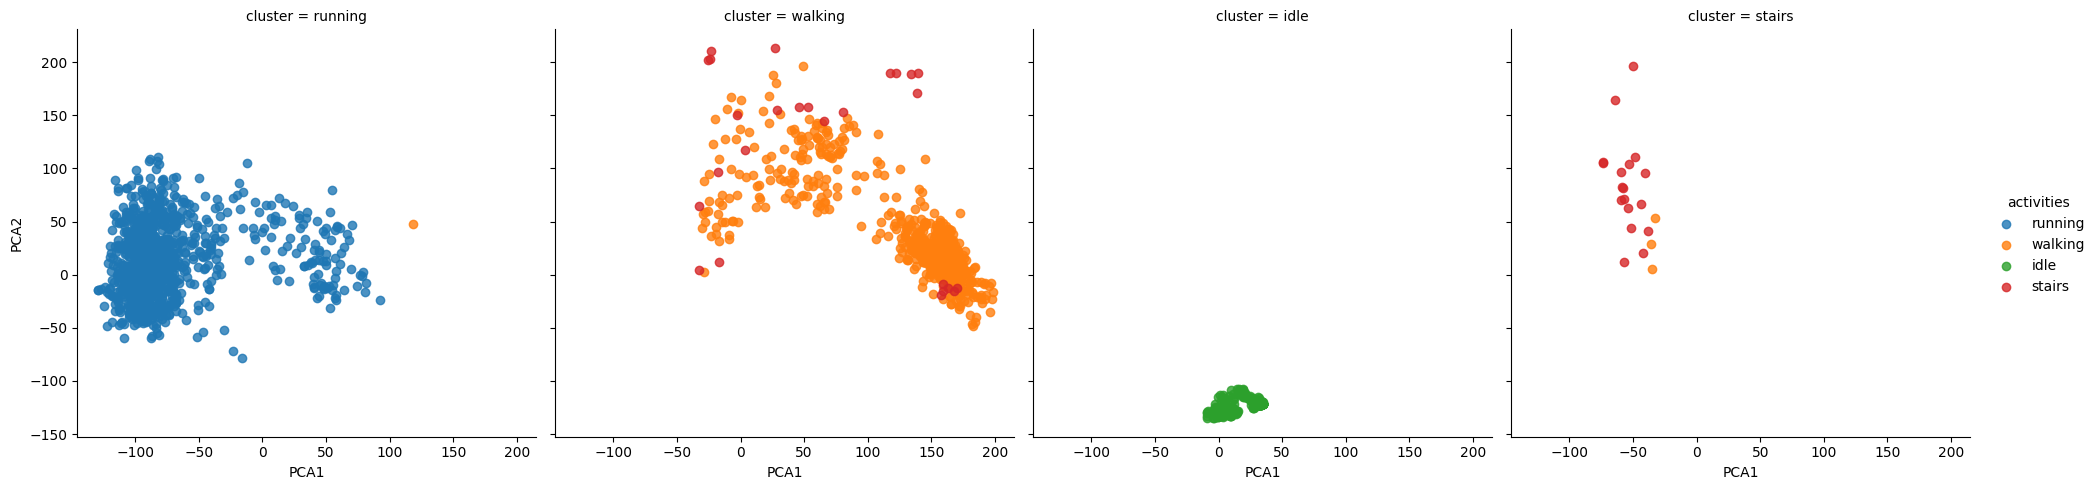

In [440]:
Xtest['cluster'] = y_model_dt_gini
Xtest['activities'] = ytest
sns.lmplot(x='PCA1', y = 'PCA2', data=Xtest, hue='activities', col='cluster', fit_reg=False)

In [467]:
from sklearn.svm import SVC

In [468]:
Xtrain_svm, Xtest_svm, ytrain_svm, ytest_svm = train_test_split(x_full_sample, y_full_sample, test_size=0.3, random_state=42)

In [469]:
model_svm = make_pipeline(RobustScaler(),
                      SVC(kernel='rbf'))

In [470]:
svm_pred = model_svm.fit(Xtrain_svm, ytrain_svm).predict(Xtest_svm)

In [471]:
cm = confusion_matrix(ytest_svm, svm_pred)
print(cm)
acc = accuracy_score(ytest_svm, svm_pred)
print(acc)

[[ 317    0    0    0]
 [   0 1022    0    0]
 [   0    0   44    0]
 [   0    0    2  554]]
0.998968540484786


In [472]:
cv_score = cross_val_score(model, x_full_sample, y_full_sample, cv=5).mean()
cv_score

0.9863817794794068

Text(113.9222222222222, 0.5, 'true value')

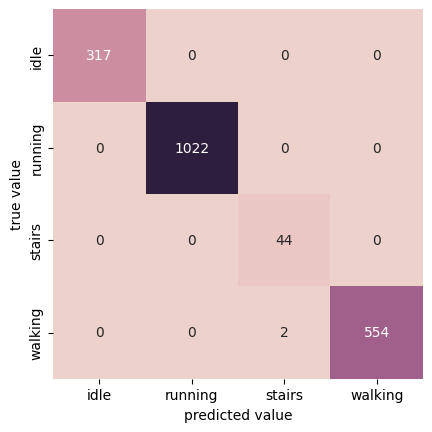

In [473]:
sns.heatmap(cm, 
            annot=True, 
            fmt='.0f',
            square=True,
            cmap=sns.cubehelix_palette(as_cmap=True), 
            xticklabels=['idle', 'running', 'stairs', 'walking'], 
            yticklabels=['idle', 'running', 'stairs', 'walking'],
           cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [474]:
model_2 = PCA(n_components=2)

In [475]:
model_2.fit(Xtest_svm)
X_2d_svm = model_2.transform(Xtest_svm)

In [476]:
Xtest_svm['PCA1'] = X_2d_svm[:, 0]
Xtest_svm['PCA2'] = X_2d_svm[:, 1]

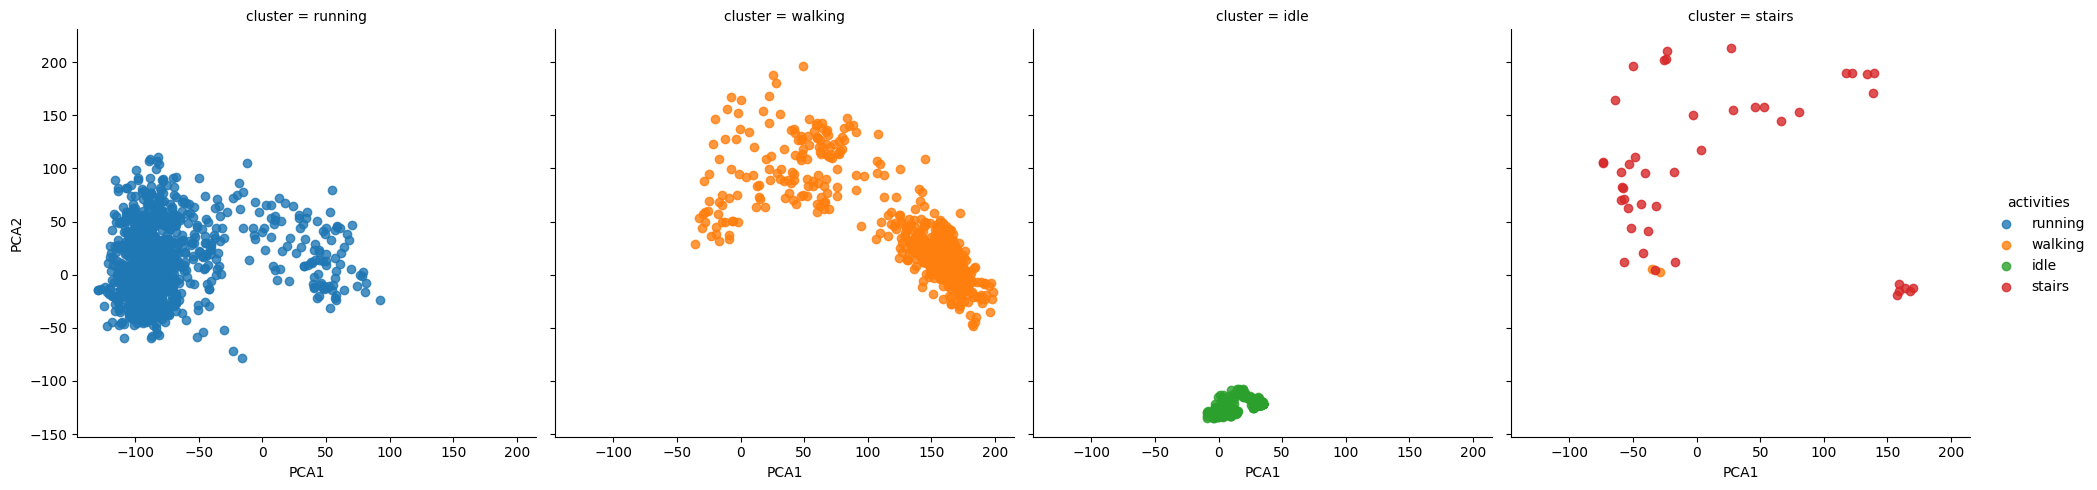

In [477]:
Xtest_svm['cluster'] = svm_pred
Xtest_svm['activities'] = ytest_svm
sns.lmplot(x='PCA1', y = 'PCA2', data=Xtest_svm, hue='activities', col='cluster', fit_reg=False)